In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 500)

<div style="text-align: center; color: #191970; font-size: 40px; font-family: 'Times New Roman'; font-weight: bold;">
PART A [Q 4.3]
</div>



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Preprocessing </span>

In [1]:
# Define the input and output file paths
input_file_path = "Data_3.txt"  # Replace with the path to your input file
output_file_path = "Processed_Data_3.txt"  # Replace with your desired output file path

# Read the file and process
with open(input_file_path, 'r') as file:
    lines = file.readlines()

# Filter to keep only the first three lines with sentences starting with "<s>"
filtered_lines = [line for line in lines if line.strip().startswith("<s>")][:3]

# Write the filtered lines to a new file
with open(output_file_path, 'w') as output_file:
    output_file.writelines(filtered_lines)

print(f"Processed file saved to {output_file_path}")


Processed file saved to Processed_Data_3.txt


In [3]:
# Define the path to the processed file
processed_file_path = "Processed_Data_3.txt"  # Replace with the path to your processed file

# Read the file into a variable
with open(processed_file_path, 'r') as file:
    sentences = file.readlines()


# Remove <s> and </s> from the sentences
cleaned_sentences = [
    sentence.replace("<s>", "").replace("</s>", "").strip()
    for sentence in sentences
]

# Debug: Print cleaned sentences to verify
print("Cleaned Sentences:", cleaned_sentences)


Cleaned Sentences: ['He read a book', 'I read a different book', 'He read a book by Danielle']



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Implement in Python Using Both Unsmoothed and Smoothed Bigram Language Models and Report the Respective Sentence Probabilities. </span>


<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Unsmoothed Bigram Language Models </span>

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE  # Maximum Likelihood Estimation


# Step 1: Tokenize the sentences
tokenized_sentences = [list(map(str.lower, word_tokenize(sentence.strip()))) 
                       for sentence in cleaned_sentences]

# Step 2: Prepare the data for bigrams modeling
n = 2  # Number of grams
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_sentences)

# Step 3: Train the MLE model
model = MLE(n)  # Train a bigrams maximum likelihood estimation model
model.fit(train_data, padded_sents)

# Step 4: Calculate the probability of a target sentence
target_sentence = "I read a book by Danielle"  # Sentence for which we want the probability
tokenized_target = list(map(str.lower, word_tokenize(target_sentence)))
padded_target = list(nltk.lm.preprocessing.pad_both_ends(tokenized_target, n))

# Calculate the probability of the sentence
probability = 1.0
for ngram in nltk.ngrams(padded_target, n):
    prob = model.score(ngram[-1], ngram[:-1])  # Conditional probability
    probability *= prob
    print(f"Probability of {ngram}: {prob:.4f}")

print(f"\nOverall probability of the sentence '{target_sentence}': {probability:.10f}")


Probability of ('<s>', 'i'): 0.3333
Probability of ('i', 'read'): 1.0000
Probability of ('read', 'a'): 1.0000
Probability of ('a', 'book'): 0.6667
Probability of ('book', 'by'): 0.3333
Probability of ('by', 'danielle'): 1.0000
Probability of ('danielle', '</s>'): 1.0000

Overall probability of the sentence 'I read a book by Danielle': 0.0740740741



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Smoothed Bigram Language Models </span>

In [11]:
from collections import defaultdict
import numpy as np

# Define the cleaned sentences
cleaned_sentences = ['He read a book', 'I read a different book', 'He read a book by Danielle']

# Preprocess sentences into tokens
tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

# Build the bigram counts and unigram counts
bigram_counts = defaultdict(lambda: defaultdict(int))
unigram_counts = defaultdict(int)

for sentence in tokenized_sentences:
    tokens = ['<s>'] + sentence + ['</s>']  # Add start and end tokens
    for i in range(len(tokens) - 1):
        unigram_counts[tokens[i]] += 1
        bigram_counts[tokens[i]][tokens[i+1]] += 1
    unigram_counts[tokens[-1]] += 1  # Add count for the final token

# Add vocabulary size for smoothing
vocab_size = len(unigram_counts)

# Define a function to calculate bigram probability with Laplace smoothing
def bigram_probability(sentence, bigram_counts, unigram_counts, vocab_size):
    tokens = ['<s>'] + sentence.split() + ['</s>']  # Add start and end tokens
    probability = 1.0

    print("Bigram probabilities:")
    for i in range(len(tokens) - 1):
        word1, word2 = tokens[i], tokens[i+1]
        count_bigram = bigram_counts[word1][word2]
        count_unigram = unigram_counts[word1]
        # Apply Laplace smoothing
        prob = (count_bigram + 1) / (count_unigram + vocab_size)
        probability *= prob
        print(f"P({word2} | {word1}) = ({count_bigram} + 1) / ({count_unigram} + {vocab_size}) = {prob:.6f}")

    return probability

# Sentence to calculate the probability
test_sentence = "I read a book by Danielle"

# Calculate the probability
sentence_probability = bigram_probability(test_sentence, bigram_counts, unigram_counts, vocab_size)

print(f"\nOverall probability of the sentence '{test_sentence}': {sentence_probability:.10f}")


Bigram probabilities:
P(I | <s>) = (1 + 1) / (3 + 10) = 0.153846
P(read | I) = (1 + 1) / (1 + 10) = 0.181818
P(a | read) = (3 + 1) / (3 + 10) = 0.307692
P(book | a) = (2 + 1) / (3 + 10) = 0.230769
P(by | book) = (1 + 1) / (3 + 10) = 0.153846
P(Danielle | by) = (1 + 1) / (1 + 10) = 0.181818
P(</s> | Danielle) = (1 + 1) / (1 + 10) = 0.181818

Overall probability of the sentence 'I read a book by Danielle': 0.0000101014


<div style="text-align: center; color: #191970; font-size: 40px; font-family: 'Times New Roman'; font-weight: bold;">
PART B
</div>


<div style="text-align: center; color: #191970; font-size: 40px; font-family: 'Times New Roman'; font-weight: bold;">
EDA
</div>



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Showing Basic Data Information </span>

In [36]:
import pandas as pd

text_df = pd.read_csv("Telegram Dataset.csv")

text_df

text_type                                               text
0          spam  naturally irresistible your corporate identity...
1          spam  the stock trading gunslinger fanny is merrill ...
2          spam  unbelievable new homes made easy im wanting to...
3          spam  4 color printing special request additional in...
4          spam  do not have money get software cds from here s...
...         ...                                                ...
20343       ham                                               /ban
20344       ham                                               /ban
20345       ham                                               /ban
20346       ham                                          Kaisi hii
20347       ham                                            Shock q

[20348 rows x 2 columns]

In [8]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  20348 non-null  object
 1   text       20348 non-null  object
dtypes: object(2)
memory usage: 318.1+ KB



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Change Variable Type </span>

In [38]:
# Convert 'text' to string and replace NaN with an empty string
text_df['text'] = text_df['text'].fillna('').astype("string")

# Convert 'text_type' to string and replace NaN with an empty string
text_df['text_type'] = text_df['text_type'].fillna('').astype("string")

print(text_df['text'].dtype)
print(text_df['text_type'].dtype)



string
string



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Check for Duplicate Rows </span>

In [40]:
# Check for duplicate rows
duplicates = text_df[text_df.duplicated()]

# Display the duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

duplicates


Number of duplicate rows: 14


text_type                                               text
20329       ham  SPAM DETECTION  User:     Username: @DillyBubb...
20330       ham  SPAM DETECTION  User:     Username: @DillyBubb...
20331       ham  SPAM DETECTION  User:     Username: @DillyBubb...
20332       ham  SPAM DETECTION  User:     Username: @DillyBubb...
20334       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20335       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20336       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20337       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20338       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20339       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20340       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20343       ham                                               /ban
20344       ham                                               /ban
20345       ham                                               /ban


<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Remove Duplicate Rows </span>

In [42]:

# Display the number of rows before removing duplicates
print(f"Number of rows before removing duplicates: {text_df.shape[0]}")

# Remove duplicate rows from the DataFrame
text_df = text_df.drop_duplicates(keep='last')


# Display the number of rows after removing duplicates

print(f"Number of rows after removing duplicates: {text_df.shape[0]}")



Number of rows before removing duplicates: 20348
Number of rows after removing duplicates: 20334



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Word Cloud for Text </span>

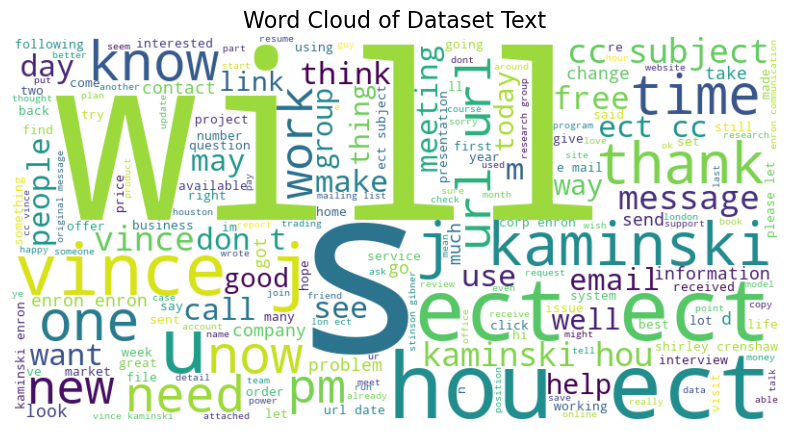

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = " ".join(text_df['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Word Cloud of Dataset Text", fontsize=16)
plt.show()



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Explore URL Rows </span>

In [46]:
import re

# Function to extract content starting from 'url', 'http', or 'www' and ignore the rest
def extract_from_url_http_www(text):
    # Match content starting from 'url', 'http', or 'www'
    match = re.search(r'\b(url|http\S*|www\S*)\b.*', text, flags=re.IGNORECASE)
    return match.group(0) if match else None

# Filter rows containing 'url', 'http', or 'www' and create a deep copy
filtered_df = text_df[
    text_df['text'].str.contains(r'\burl\b', case=False, na=False) | 
    text_df['text'].str.contains(r'\bhttp\S*', case=False, na=False) | 
    text_df['text'].str.contains(r'\bwww\S*', case=False, na=False)
].copy()

# Apply the extraction function to extract the relevant content
filtered_df['extracted_content'] = filtered_df['text'].apply(extract_from_url_http_www)

# Save the resulting DataFrame to a new CSV if needed
filtered_df.to_csv("filtered_extracted_content.csv", index=False)

# Print number of rows
print("Total Number of Rows: ", filtered_df.shape[0])

# Display the filtered and processed DataFrame
filtered_df



Total Number of Rows:  2562


text_type                                               text  \
10         spam  las vegas high rise boom las vegas is fast bec...   
15         spam  search engine position be the very first listi...   
21         spam  wearable electronics hi my name is jason i rec...   
32         spam  ilug guaranteed to lose 10 12 lbs in 30 days 1...   
35         spam  failure notice hi this is the qmail send progr...   
...         ...                                                ...   
17429      spam  all pubg hack reseller fnàtic mod antibañ hack...   
17477      spam  new biggest loot 🤑 signup 0😱 3 refer 100 min w...   
18171      spam  ⚜⚜ⓚⓥⓛⓜⓞⓥⓘⓔⓢ⚜⚜ watch online or download just in...   
18611      spam  is this true 👍👍 whenever there is a good 👑oppo...   
18969       ham  aww errerror unable to download webpage http e...   

                                       extracted_content  
10     http www verticallv com message has been sent ...  
15     url s if you are interested in promoting this ...  
21     www clothingplus fi and wanted to offer my ser...  
32     http www linux ie mailman listinfo ilug for un...  
35     http id j 87 gzo 24815823 tue 19 jul 2005 10 5...  
...                                                  ...  
17429                       https://0 cheap price key dm  
17477                                              http:  
18171  http work at home stay healthy stay safe 👍👍pla...  
18611  https referral link https nominexio? r 82754 r...  
18969  http error 503 service temporarily unavailable...  

[2562 rows x 3 columns]


<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Bar Chart of Count vs text_type </span>

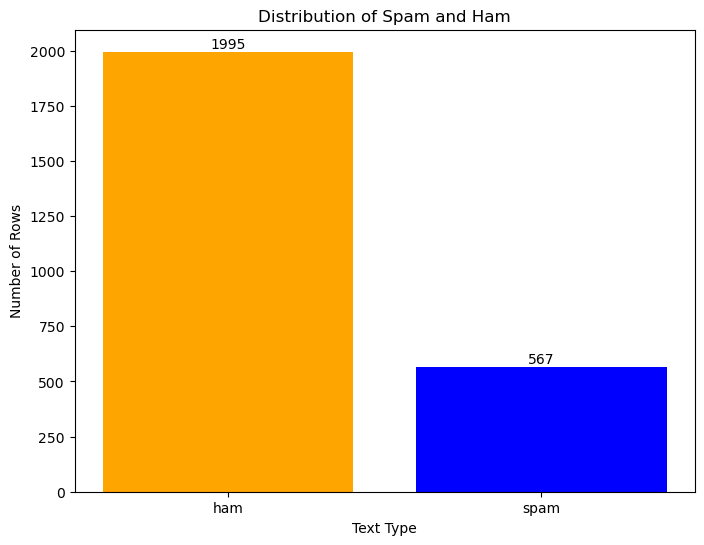

In [48]:
# Check the portion of text type in the text that contains links
if 'text_type' in filtered_df.columns:
    # Count the occurrences of each label
    label_counts = filtered_df['text_type'].value_counts()

    # Plot the counts as a bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(label_counts.index, label_counts.values, color=['orange', 'blue'])
    plt.title('Distribution of Spam and Ham')
    plt.xlabel('Text Type')
    plt.ylabel('Number of Rows')
    plt.xticks(rotation=0)

    # Add exact figures on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

    # Show the plot
    plt.show()
else:
    print("Column 'text_type' not found in the DataFrame. Please verify the label column.")



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Replacing URL with Tag </span>

In [50]:
import re

# Function to replace URLs and URL-like patterns with a placeholder
def replace_urls_with_placeholder(text):
    # Regex pattern to match URLs or URL-like patterns ending with common TLDs
    url_pattern = r'\b(http|https|www)(?:\s+\S+)*?\s+\b(com|net|org|edu|gov|info|biz|io|co|us)\b'
    return re.sub(url_pattern, '<URL>', text, flags=re.IGNORECASE).strip()

# Ensure text_df is a copy of the DataFrame to avoid SettingWithCopyWarning
text_df = text_df.copy()

# Apply the function to replace URLs in the 'text' column
text_df['text'] = text_df['text'].apply(replace_urls_with_placeholder)

# Save the updated DataFrame to a CSV file
text_df.to_csv("text_with_url_placeholder.csv", index=False)

# Display the updated DataFrame
text_df


text_type                                               text
0          spam  naturally irresistible your corporate identity...
1          spam  the stock trading gunslinger fanny is merrill ...
2          spam  unbelievable new homes made easy im wanting to...
3          spam  4 color printing special request additional in...
4          spam  do not have money get software cds from here s...
...         ...                                                ...
20340       ham  SPAM ALERT  🚔  User:     Username: @DillyBubbl...
20341       ham                                           Hum ky h
20345       ham                                               /ban
20346       ham                                          Kaisi hii
20347       ham                                            Shock q

[20334 rows x 2 columns]


<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Check for Case Where Text Contains '@' </span>

In [52]:
# Add a new column to count the occurrence of '@' in each row of the 'text' column
text_df['symbol_count'] = text_df['text'].apply(lambda x: str(x).count('@'))

# Display the updated DataFrame with the new column
print(text_df[['text', 'symbol_count']].head())



                                                text  symbol_count
0  naturally irresistible your corporate identity...             0
1  the stock trading gunslinger fanny is merrill ...             0
2  unbelievable new homes made easy im wanting to...             0
3  4 color printing special request additional in...             0
4  do not have money get software cds from here s...             0


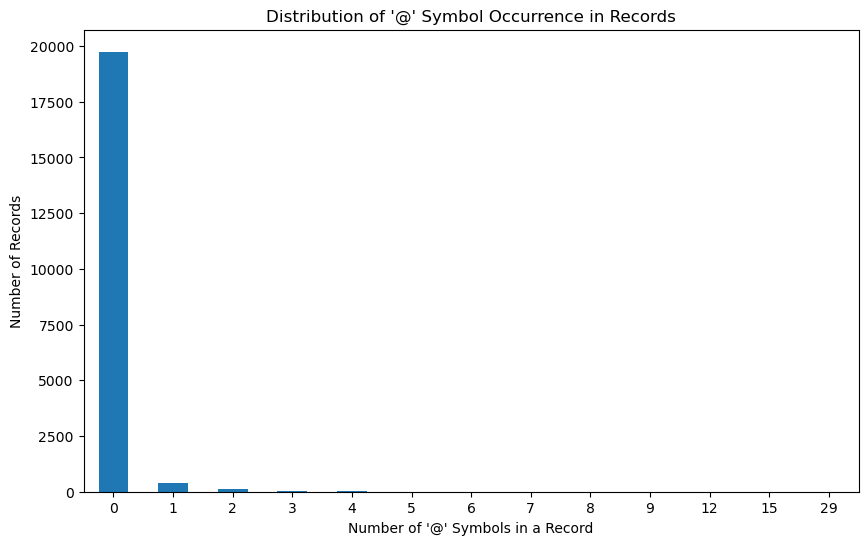

In [54]:
import matplotlib.pyplot as plt

# Aggregate counts based on the number of occurrences
symbol_occurrence_distribution = text_df['symbol_count'].value_counts().sort_index()

# Plot the distribution of symbol occurrences
plt.figure(figsize=(10, 6))
symbol_occurrence_distribution.plot(kind='bar')
plt.title("Distribution of '@' Symbol Occurrence in Records")
plt.xlabel("Number of '@' Symbols in a Record")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)
plt.show()



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Check for Case Where Text Contains Numerical Number </span>

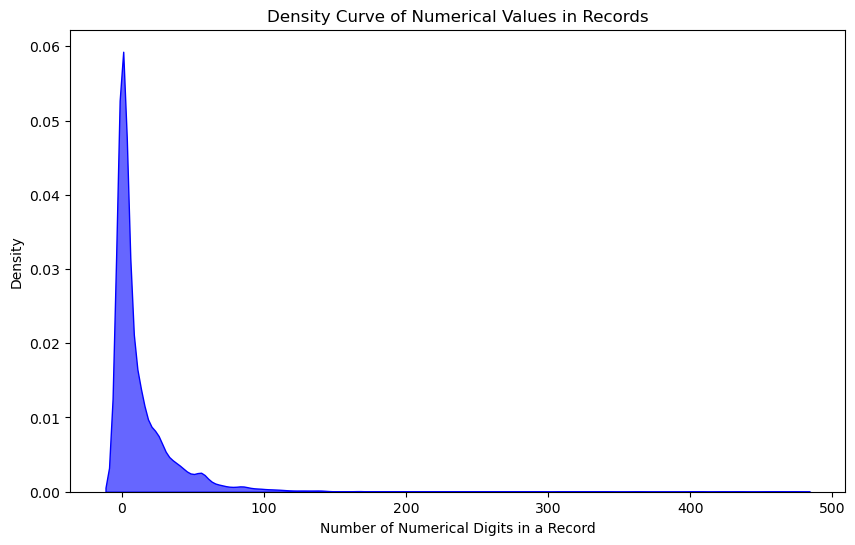

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column to count numerical occurrences in each record
text_df['number_count'] = text_df['text'].apply(lambda x: sum(char.isdigit() for char in str(x)))

# Plot the density curve
plt.figure(figsize=(10, 6))
sns.kdeplot(data=text_df, x='number_count', fill=True, color="blue", alpha=0.6)
plt.title("Density Curve of Numerical Values in Records")
plt.xlabel("Number of Numerical Digits in a Record")
plt.ylabel("Density")
plt.show()



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Emoji Count Finding </span>

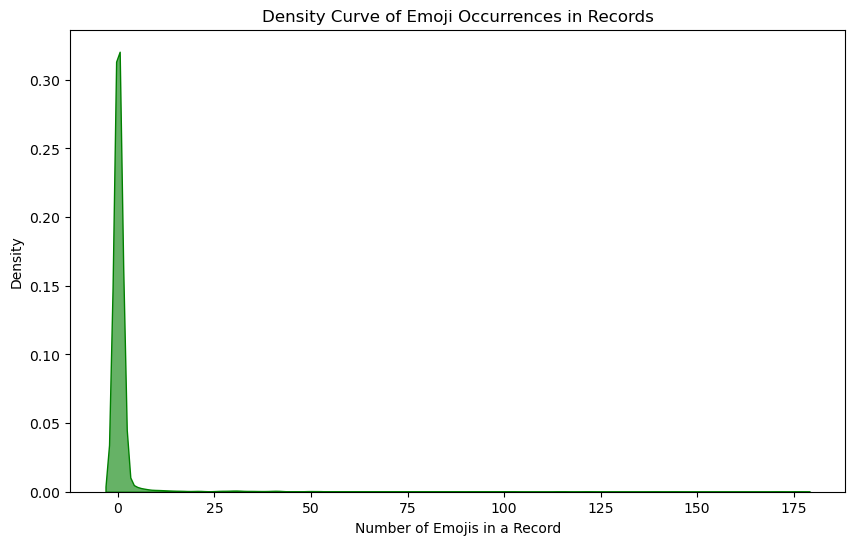

In [58]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Function to count emojis in a string
def count_emojis(text):
    # Unicode pattern to match emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric shapes
        u"\U0001F800-\U0001F8FF"  # Supplemental arrows
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols & pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess symbols
        u"\U0001FA70-\U0001FAFF"  # Supplemental symbols & pictographs
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+",
        flags=re.UNICODE
    )
    return len(emoji_pattern.findall(str(text)))

# Add a column to count emoji occurrences in each record
text_df['emoji_count'] = text_df['text'].apply(count_emojis)


# Plot the density curve for emoji occurrences
plt.figure(figsize=(10, 6))
sns.kdeplot(data=text_df, x='emoji_count', fill=True, color="green", alpha=0.6)
plt.title("Density Curve of Emoji Occurrences in Records")
plt.xlabel("Number of Emojis in a Record")
plt.ylabel("Density")
plt.show()




<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Preprocess By Removing and Changing the Letters </span>

In [60]:
import re, nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Load English stopwords
sw = stopwords.words("english")

def get_clean_data(s):
    s = s.lower()  # Convert text to lowercase
    
    # Substitute non-alphabetical values with nothing, but retain <URL>
    s = re.sub(r"(?<!<)URL(?!>)|[^a-z<> ]", "", s)
    
    words = nltk.word_tokenize(s)
    
    # Remove stopwords from the text but keep <URL>
    words = [word for word in words if word not in sw or word == "<URL>"]
    
    words = " ".join(words)
    
    return words

# Apply the function to the text column
text_df['text'] = text_df['text'].apply(get_clean_data)

# Save the updated DataFrame to a CSV file
text_df.to_csv("text_preprocessed.csv", index=False)

# Display the updated DataFrame
text_df


text_type                                               text  \
0          spam  naturally irresistible corporate identity lt r...   
1          spam  stock trading gunslinger fanny merrill muzo co...   
2          spam  unbelievable new homes made easy im wanting sh...   
3          spam  color printing special request additional info...   
4          spam  money get software cds software compatibility ...   
...         ...                                                ...   
20340       ham  spam alert user username dillybubbles trust sp...   
20341       ham                                           hum ky h   
20345       ham                                                ban   
20346       ham                                          kaisi hii   
20347       ham                                            shock q   

       symbol_count  number_count  emoji_count  
0                 0             0            0  
1                 0             0            0  
2                 0            10            0  
3                 0            30            0  
4                 0             0            0  
...             ...           ...          ...  
20340             1            19            1  
20341             0             0            0  
20345             0             0            0  
20346             0             0            0  
20347             0             0            0  

[20334 rows x 5 columns]

In [62]:
# Replacing spam and ham with 1 and 0
text_df['text_type']=text_df['text_type'].map({'spam':1,'ham':0})

text_df

text_type                                               text  \
0              1  naturally irresistible corporate identity lt r...   
1              1  stock trading gunslinger fanny merrill muzo co...   
2              1  unbelievable new homes made easy im wanting sh...   
3              1  color printing special request additional info...   
4              1  money get software cds software compatibility ...   
...          ...                                                ...   
20340          0  spam alert user username dillybubbles trust sp...   
20341          0                                           hum ky h   
20345          0                                                ban   
20346          0                                          kaisi hii   
20347          0                                            shock q   

       symbol_count  number_count  emoji_count  
0                 0             0            0  
1                 0             0            0  
2                 0            10            0  
3                 0            30            0  
4                 0             0            0  
...             ...           ...          ...  
20340             1            19            1  
20341             0             0            0  
20345             0             0            0  
20346             0             0            0  
20347             0             0            0  

[20334 rows x 5 columns]

text_type
0    14323
1     6011
Name: count, dtype: int64


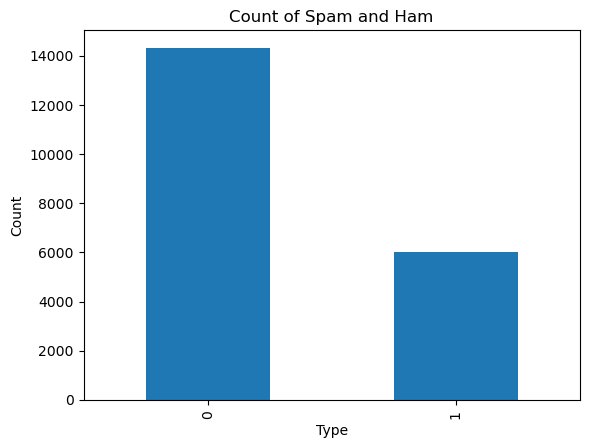

In [64]:

# Plot 
type_counts = text_df['text_type'].value_counts()

print(type_counts)


import matplotlib.pyplot as plt

# Create a bar chart
type_counts.plot(kind='bar', title='Count of Spam and Ham', xlabel='Type', ylabel='Count')
plt.show()


In [66]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm= SMOTE(random_state=42) # Initialize SMOTE algorithm


# Vectorization of the text dataset is being done
# to improve the performance of the models
from sklearn.feature_extraction.text import CountVectorizer

X = text_df['text']
y = text_df['text_type']

v = CountVectorizer()

X = v.fit_transform(X)


# Using SMOTE alg to counter balance the imbalance of class (spam and ham)
X, y = sm.fit_resample(X, y)




In [68]:

# Clean the zero
X.eliminate_zeros()

print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 568580 stored elements and shape (28646, 47621)>
  Coords	Values
  (0, 27744)	1
  (0, 20923)	1
  (0, 8763)	1
  (0, 19448)	1
  (0, 24573)	1
  (0, 34242)	1
  (0, 17865)	1
  (0, 34415)	1
  (0, 7947)	3
  (0, 25296)	2
  (0, 15843)	1
  (0, 40688)	1
  (0, 20167)	1
  (0, 20997)	1
  (0, 16911)	2
  (0, 6282)	1
  (0, 24308)	2
  (0, 40264)	1
  (0, 39784)	1
  (0, 29918)	1
  (0, 45680)	1
  (0, 24999)	1
  (0, 41257)	1
  (0, 27227)	2
  (0, 12305)	1
  :	:
  (28642, 15347)	1
  (28642, 16818)	1
  (28642, 20167)	1
  (28642, 20406)	1
  (28642, 20444)	1
  (28642, 23598)	1
  (28642, 24097)	1
  (28642, 24927)	1
  (28642, 24945)	1
  (28642, 25304)	1
  (28642, 26054)	1
  (28642, 27602)	1
  (28642, 28640)	1
  (28642, 31303)	1
  (28642, 31717)	1
  (28642, 32879)	1
  (28642, 32883)	1
  (28642, 34343)	2
  (28642, 34960)	1
  (28642, 35066)	1
  (28642, 37463)	1
  (28642, 39758)	1
  (28642, 44234)	1
  (28642, 45425)	1
  (28642, 46240)	1


<div style="text-align: center; color: #191970; font-size: 40px; font-family: 'Times New Roman'; font-weight: bold;">
Modeling Stage (Multinomial Naïve Bayes)
</div>



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Training of Base Multinomial NB Model </span>

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes, metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report 
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

model = naive_bayes.MultinomialNB()
model.fit(X_train,y_train)

model.score(X_test,y_test)*100
model.score(X_train,y_train)


# Print out the result
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
class_report_dict = classification_report(y_test, model.predict(X_test), output_dict=True)

# Convert the dictionary to a DataFrame for better formatting
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Format the DataFrame to display 4 decimal places
class_report_df = class_report_df.round(4)


print('Accuracy:',round(accuracy_score(y_test,model.predict(X_test)),4)*100,'%')
print('F1 Score:',round(f1_score(y_test,model.predict(X_test)),4)*100,'%')
print('Precision:',round(precision_score(y_test,model.predict(X_test)),4)*100,'%')
print('Recall:',round(recall_score(y_test,model.predict(X_test)),4)*100,'%')
print('*'*20)
print('Classification Report:\n',class_report_df)




Accuracy: 90.19 %
F1 Score: 90.68 %
Precision: 85.84 %
Recall: 96.1 %
********************
Classification Report:
               precision  recall  f1-score    support
0                0.9564  0.8437    0.8965  2885.0000
1                0.8584  0.9610    0.9068  2845.0000
accuracy         0.9019  0.9019    0.9019     0.9019
macro avg        0.9074  0.9023    0.9017  5730.0000
weighted avg     0.9077  0.9019    0.9016  5730.0000



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Hyperparameter Tuning: Grid Search </span>

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]}

# Perform Grid Search
grid_search = GridSearchCV(nb_model, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'alpha': 0.01}
Best F1 Score: 0.9154281561961838



<span style="color:#191970; font-size:30px; font-family:'Times New Roman'"> Training of Tuned Base Multinomial NB Model </span>

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes, metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report 
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

model = naive_bayes.MultinomialNB(alpha = grid_search.best_params_['alpha'])
model.fit(X_train,y_train)

model.score(X_test,y_test)*100
model.score(X_train,y_train)


# Print out the result
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
class_report_dict = classification_report(y_test, model.predict(X_test), output_dict=True)

# Convert the dictionary to a DataFrame for better formatting
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Format the DataFrame to display 4 decimal places
class_report_df = class_report_df.round(4)


print('Accuracy:',round(accuracy_score(y_test,model.predict(X_test)),4)*100,'%')
print('F1 Score:',round(f1_score(y_test,model.predict(X_test)),4)*100,'%')
print('Precision:',round(precision_score(y_test,model.predict(X_test)),4)*100,'%')
print('Recall:',round(recall_score(y_test,model.predict(X_test)),4)*100,'%')
print('*'*20)
print('Classification Report:\n',class_report_df)




Accuracy: 91.14999999999999 %
F1 Score: 91.47999999999999 %
Precision: 87.61 %
Recall: 95.71 %
********************
Classification Report:
               precision  recall  f1-score    support
0                0.9535  0.8666    0.9079  2885.0000
1                0.8761  0.9571    0.9148  2845.0000
accuracy         0.9115  0.9115    0.9115     0.9115
macro avg        0.9148  0.9118    0.9114  5730.0000
weighted avg     0.9151  0.9115    0.9114  5730.0000
